In [248]:
data <- read.csv('var_16_Task_5.rds',header = T)
head(data)

,Series1,Series2,Series3
,<dbl>,<dbl>,<dbl>
1,-4.623873,0.0000000,-0.2609678
2,3.779721,0.6625095,0.2484196
3,-2.531318,-1.5575225,0.5027191
4,-1.365250,-3.1923388,0.7380015
5,7.053184,2.1908862,0.5783401
6,-2.326373,8.9001067,0.1738024


In [223]:
install.packages("TSA")
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’



Attaching package: ‘TSA’


The following object is masked from ‘package:tuneR’:

    periodogram


The following object is masked from ‘package:seewave’:

    spec


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




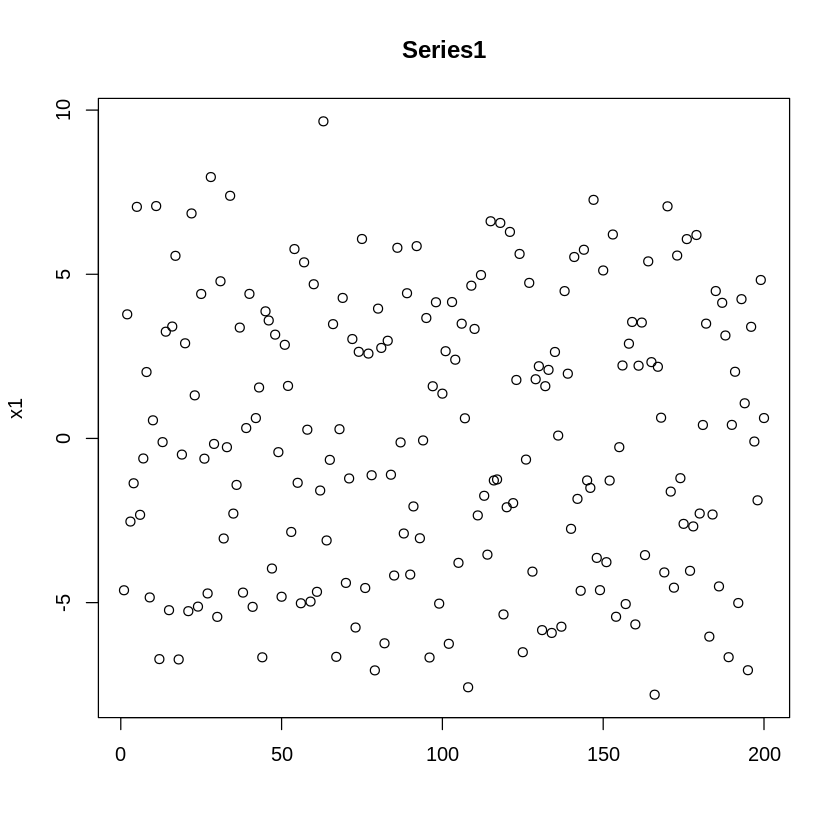

In [249]:
x1 <- data[,1]
matplot(x1,type='p',main='Series1',pch=21)

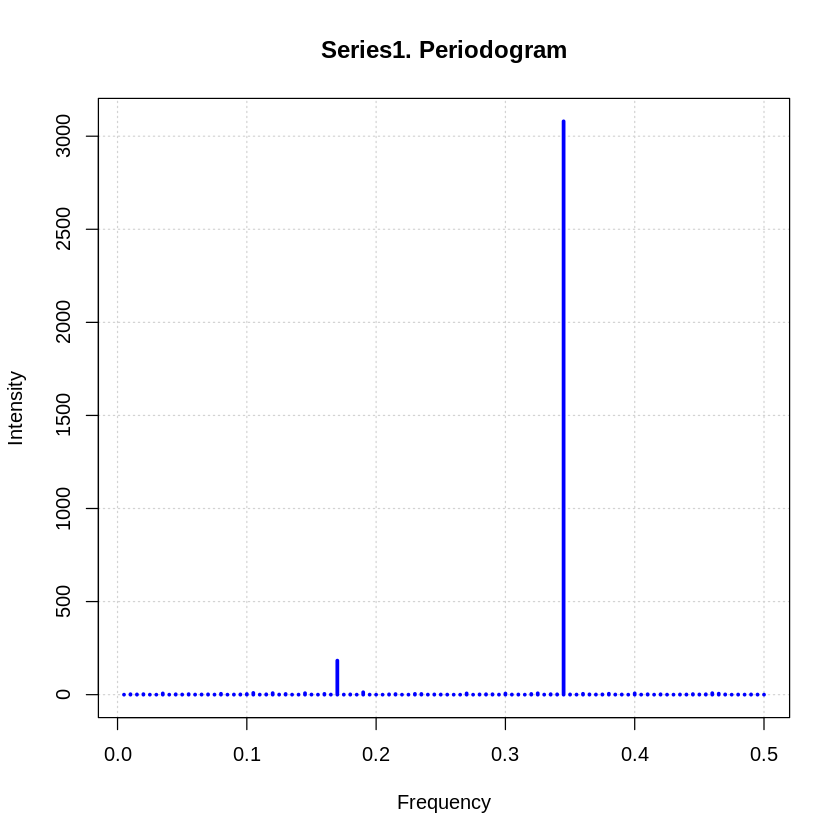

In [250]:
pgm<- periodogram(x1, col = "blue",lwd = 3,main = 'Series1. Periodogram',xlab='Frequency',ylab='Intensity',panel.first=grid(nx=NULL,ny = NULL))

In [251]:
freq1 = pgm$freq[which(pgm$spec == max(pgm$spec))]
freq1

[1] 0.345

In [252]:
pgm$spec[which(pgm$spec == max(pgm$spec))] <- 0
freq2 = pgm$freq[which(pgm$spec == max(pgm$spec))]
freq2

[1] 0.17

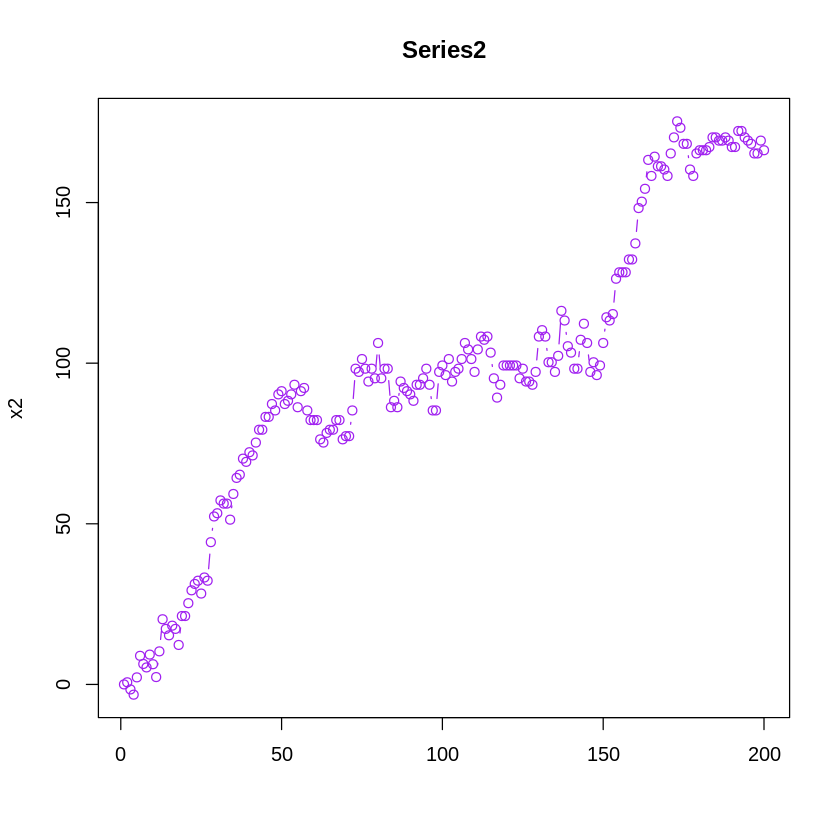

In [253]:
x2 <- data[,2]
matplot(x2,type='b',main='Series2',pch=21,col='purple')

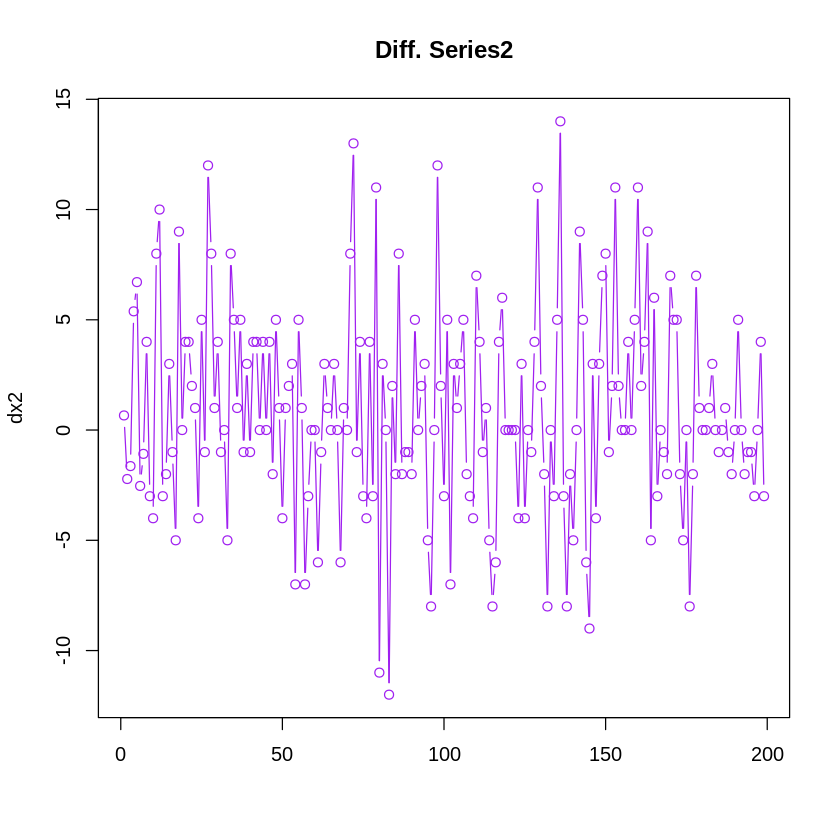

In [254]:
dx2 <-diff(x2)
matplot(dx2,type='b',main='Diff. Series2',pch=21,col='purple')

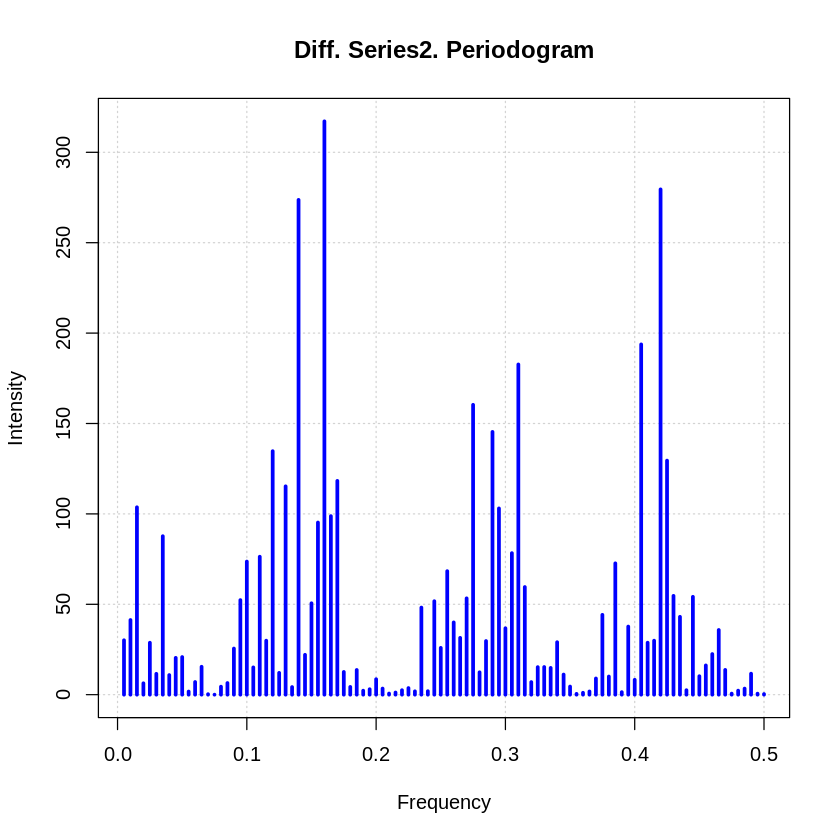

In [255]:
pgm<- periodogram(dx2, col = "blue",lwd = 3,main = 'Diff. Series2. Periodogram',xlab='Frequency',ylab='Intensity',panel.first=grid(nx=NULL,ny = NULL))

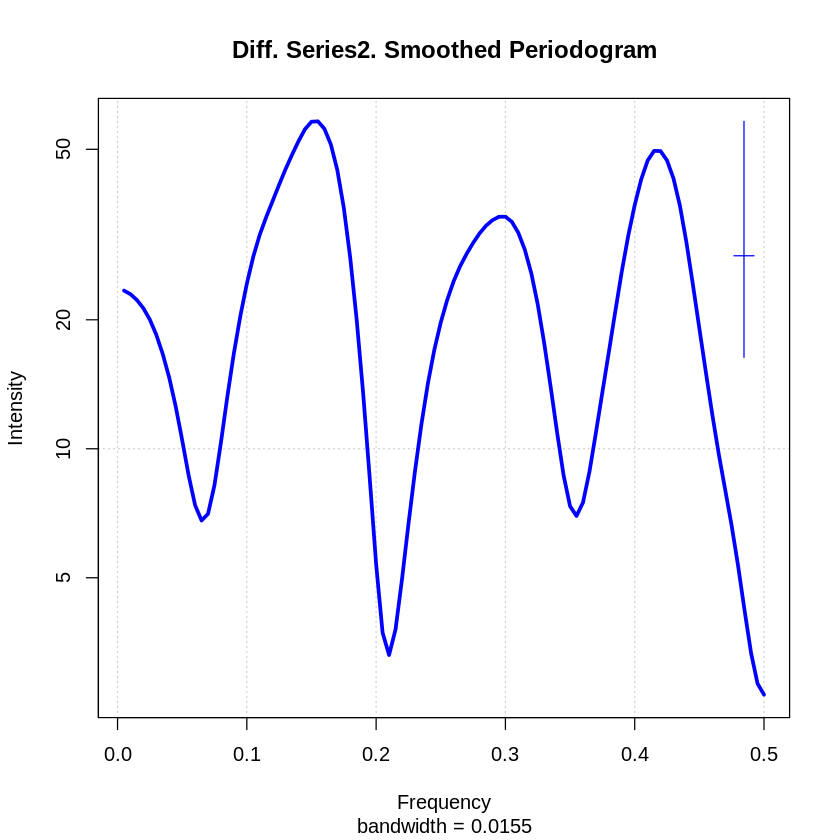

In [256]:
specc <-spec.pgram(dx2,c(7,7,7),col = "blue",lwd = 3,main = 'Diff. Series2. Smoothed Periodogram',xlab='Frequency',ylab='Intensity',panel.first=grid(nx=NULL,ny = NULL))

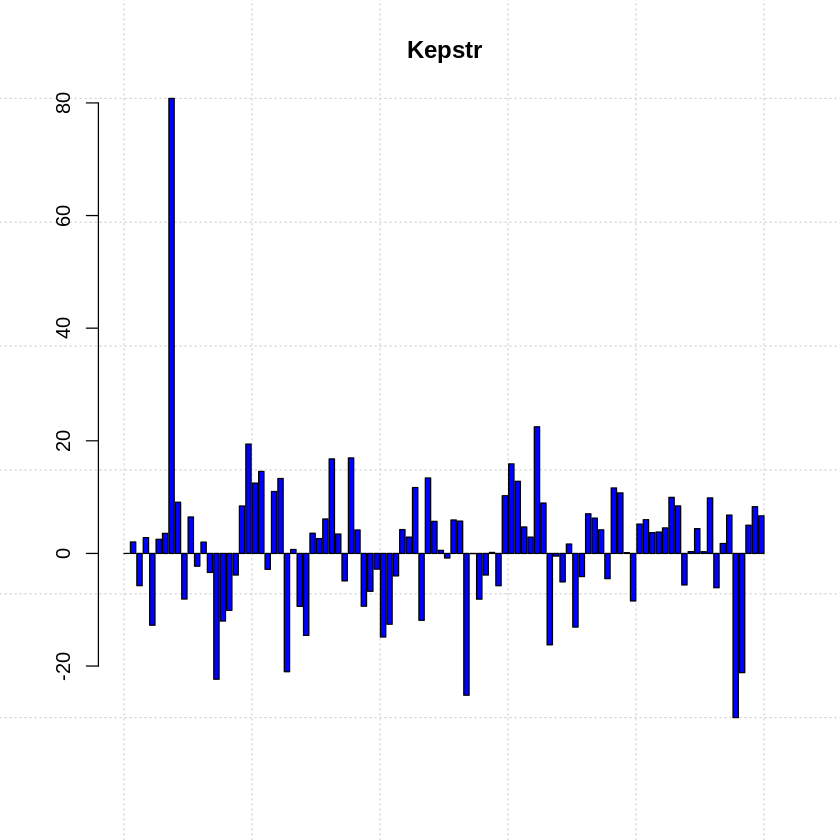

In [257]:
l <- Re(fft(log(abs(fft(dx2))), inverse = TRUE))
l[1]=0
barplot(l[1:100],col = "blue",main="Kepstr",panel.first=grid(nx=NULL,ny = NULL))

In [264]:
kepstr = max(l)
kepstr

[1] 80.80662

In [265]:
l[8]

[1] 80.80662

In [266]:
delay = 7

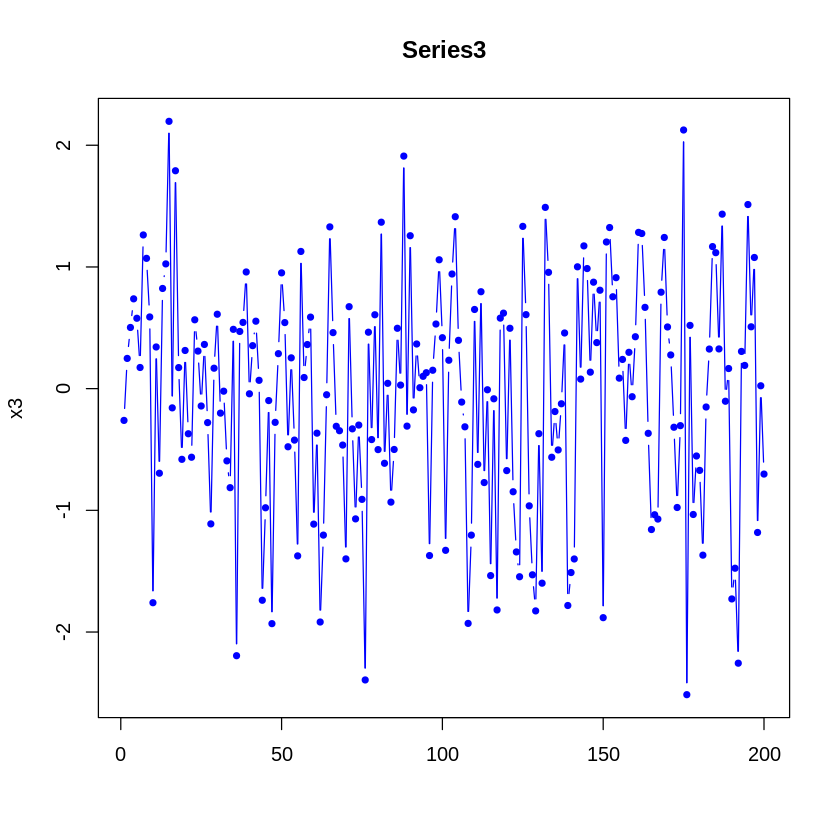

In [267]:
x3 <- data[,3]
matplot(x3,type='b',main='Series3',pch=20,col='blue')

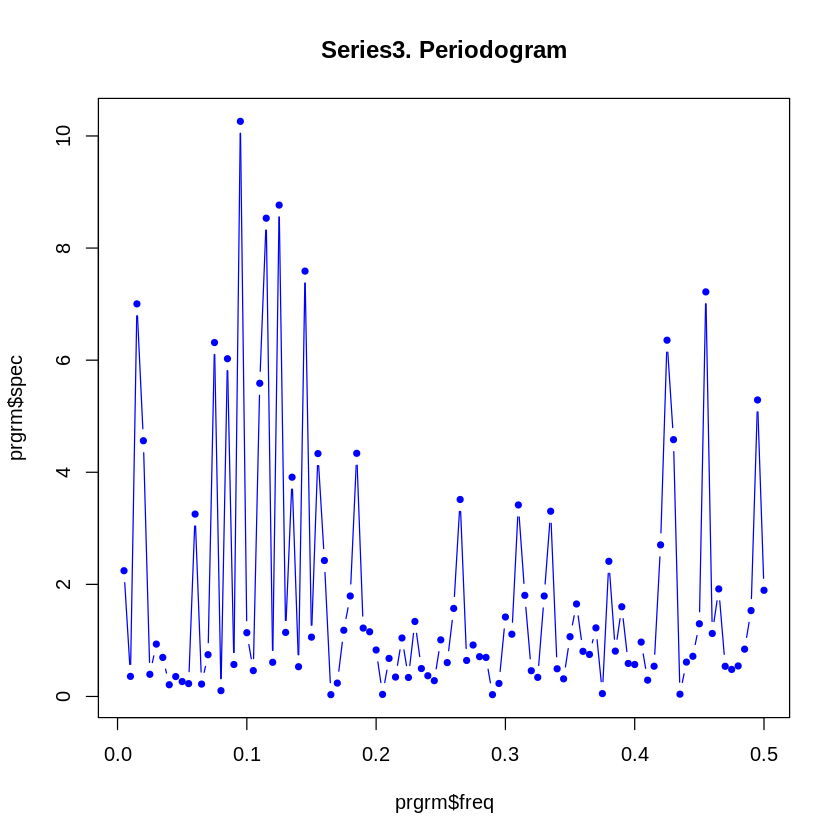

In [268]:
prgrm<- periodogram(x3, col = "blue",lwd = 3,plot = FALSE)
plot(prgrm$freq,prgrm$spec,main = "Series3. Periodogram", type = 'b',pch = 20, col='blue')

In [269]:
(sd_prgrm<- sd(prgrm$spec))

[1] 2.214823

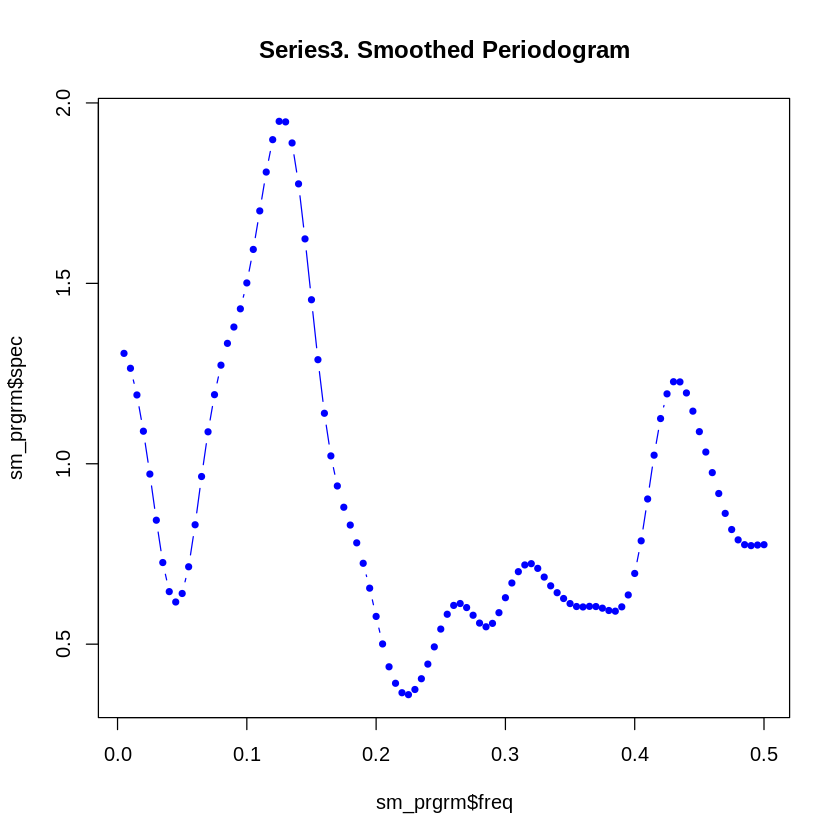

In [270]:
sm_prgrm <-spec.pgram(x3,c(7,7,7),plot=FALSE)
plot(sm_prgrm$freq,sm_prgrm$spec,type = 'b',pch = 20,main = "Series3. Smoothed Periodogram",col='blue')

In [271]:
(sd_sm_prgrm<- sd(sm_prgrm$spec))

[1] 0.3947497

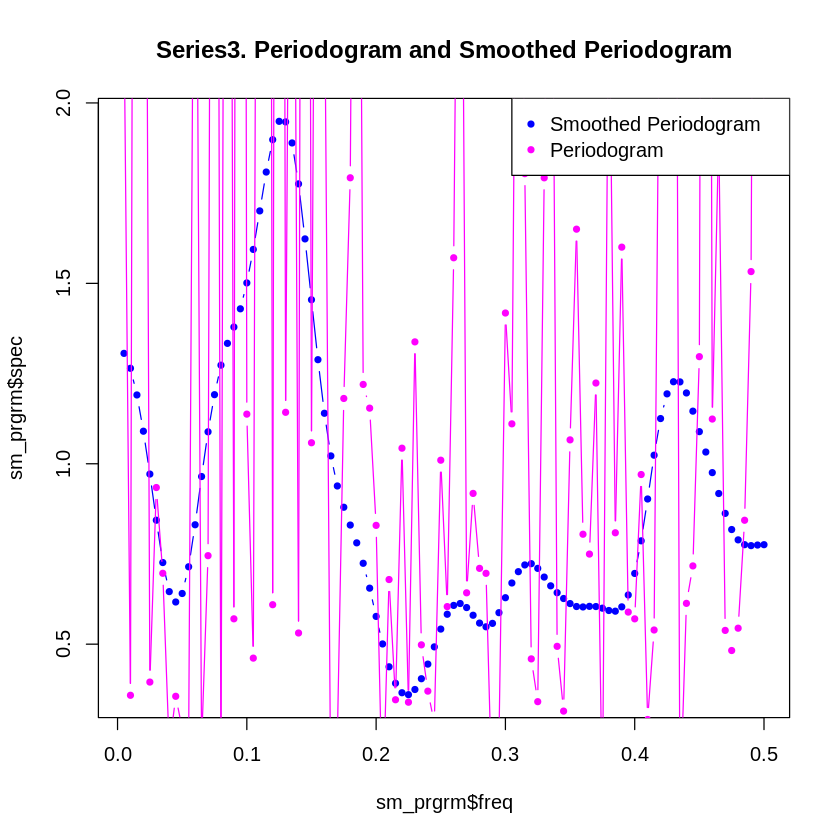

In [274]:
plot(sm_prgrm$freq,sm_prgrm$spec,type = 'b',pch = 20,main = "Series3. Periodogram and Smoothed Periodogram",col='blue')
lines(prgrm$freq,prgrm$spec, type = 'b',pch = 20, col='Magenta')
legend("topright",legend= c("Smoothed Periodogram","Periodogram"),col = c("blue","magenta"),pch = 20)

In [275]:
freq1
freq2
kepstr
delay
sd_prgrm
sd_sm_prgrm

[1] 0.345

[1] 0.17

[1] 80.80662

[1] 7

[1] 2.214823

[1] 0.3947497

In [ ]:
install.packages(c("seewave","tuneR"))
library(seewave)
library(tuneR)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘signal’




In [ ]:
file52 <- readWave("var5_2.wav")

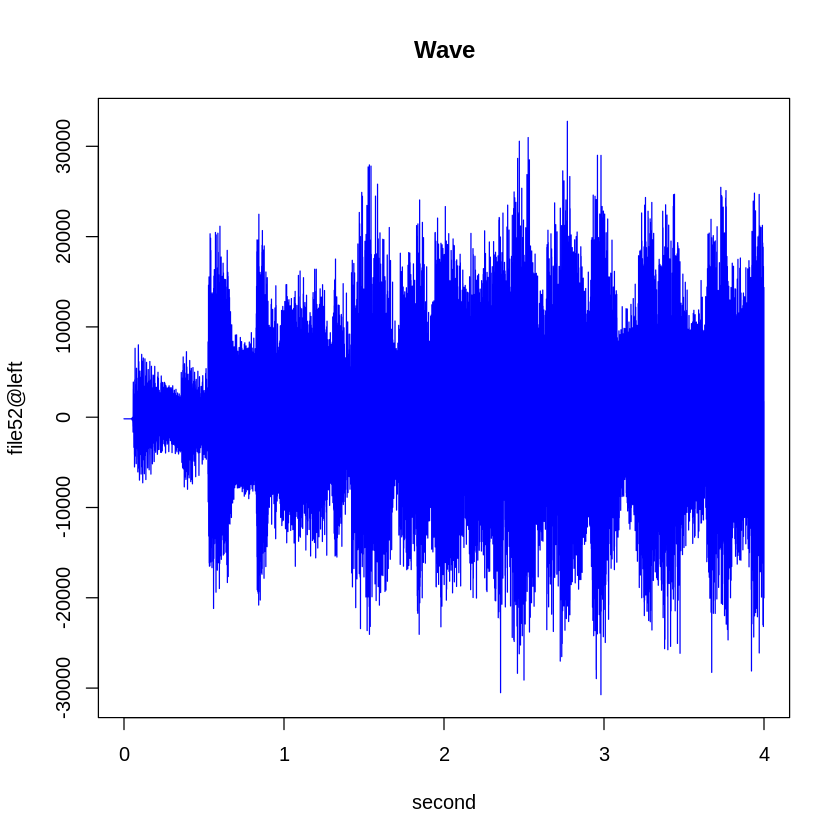

In [ ]:
N <- length(file52@left)
xt <- seq(0, N/file52@samp.rate, length.out = N)
matplot(xt,file52@left,type ="l",xlab = "second",col="blue",main = "Wave")

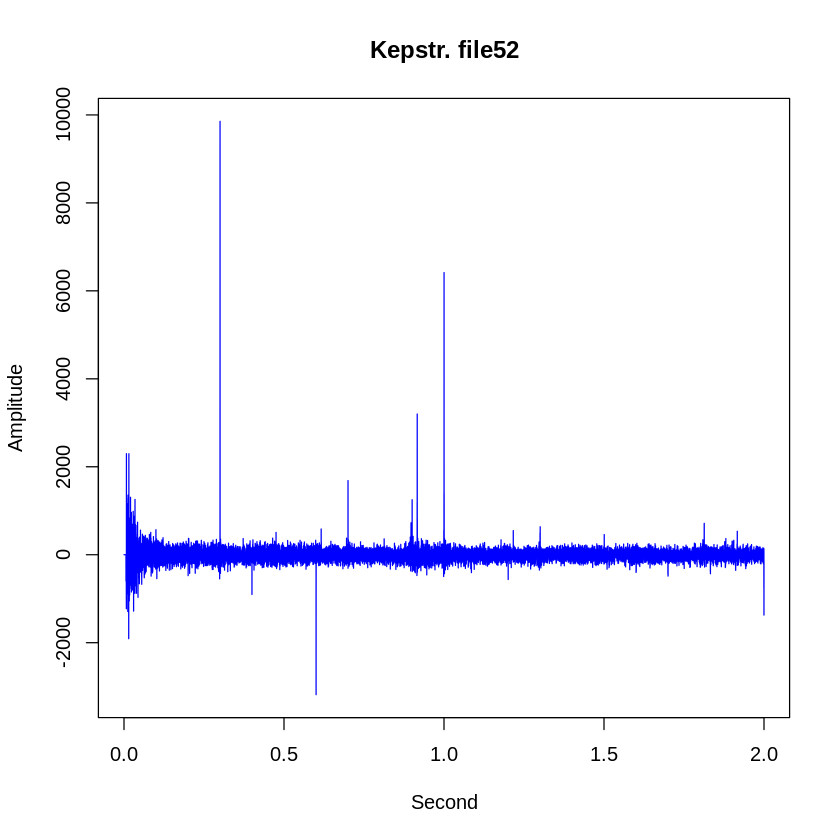

In [203]:
lecho<-ceps(file52,file52@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file52 Kepstrum")
lecho[1:50,2]<- 0

matplot(lecho[,1],lecho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr. file52" )

In [141]:
#findecho
max(lecho)
delayindex = which(lecho == max(lecho)) - (length(lecho) / 2)

[1] 9854.678

In [145]:
timestep = lecho[2]

In [142]:
delay1 = lecho[delayindex]

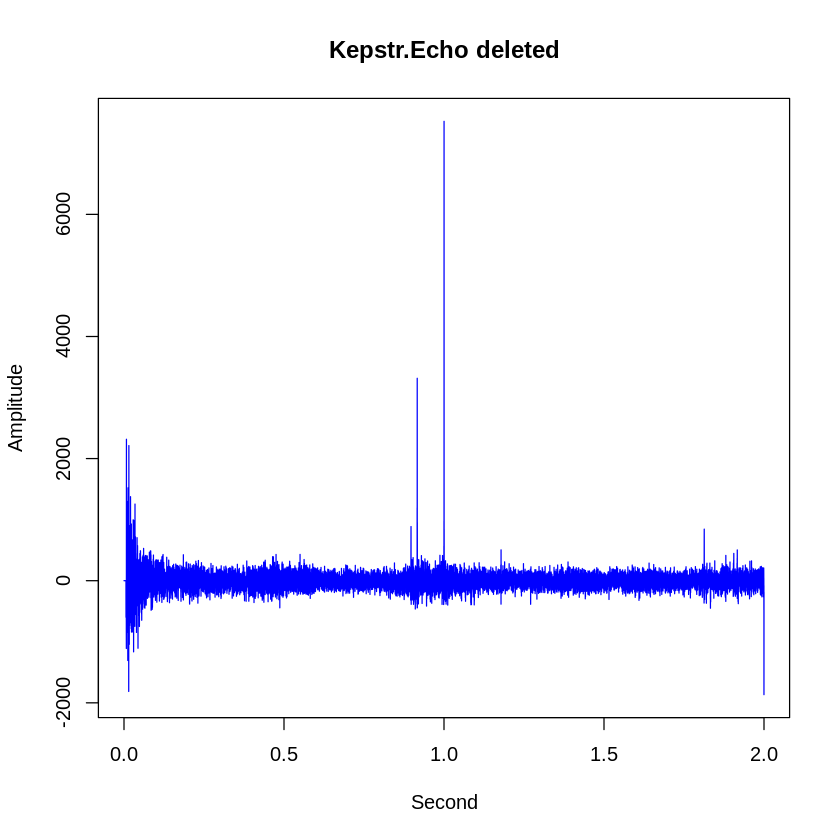

In [204]:
delayindex = which(lecho == max(lecho)) - (length(lecho) / 2)
delay1 = lecho[delayindex]
d1 <- deleteecho(file52,lecho,file52@samp.rate, delay1 - timestep, 0.9)

decho<-ceps(d1,file52@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file52 Kepstrum")
decho[1:50,2]<- 0
matplot(decho[,1],decho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr.Echo deleted" )

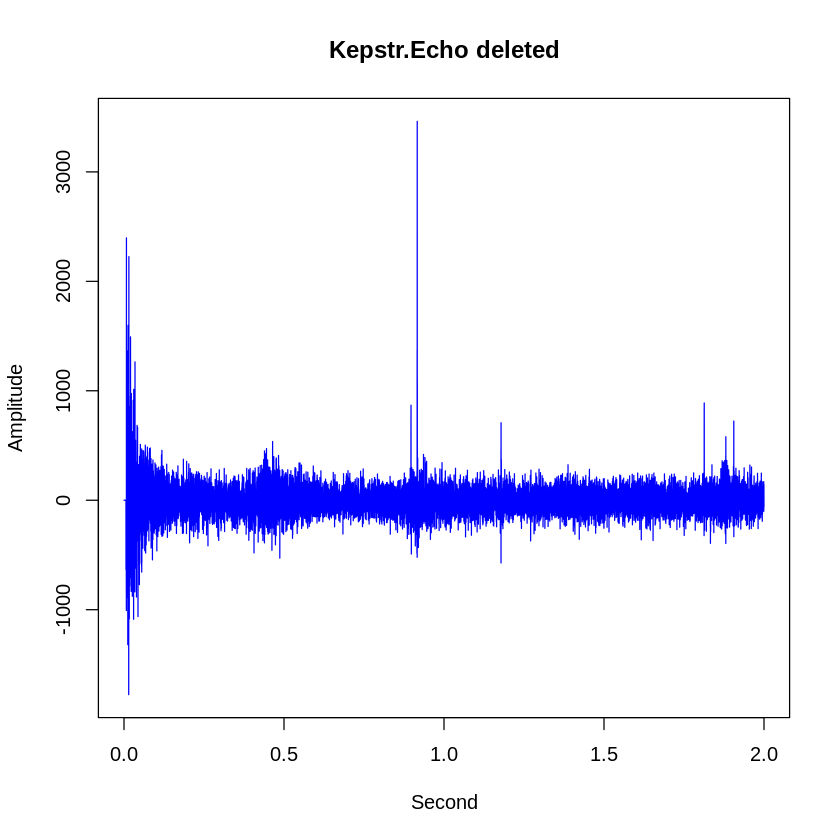

In [206]:
temp <- lecho[delayindex + (length(lecho) / 2)]
lecho[delayindex + (length(lecho) / 2)] <- 0
delayindex2 = which(lecho == max(lecho)) - (length(lecho) / 2)
delay2 = lecho[delayindex2]
lecho[delayindex + (length(lecho) / 2)] <- temp
d2 <- deleteecho(d1,lecho,file52@samp.rate, delay2 - timestep, 0.8)

decho<-ceps(d2,file52@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file52 Kepstrum")
decho[1:50,2]<- 0
matplot(decho[,1],decho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr.Echo deleted" )

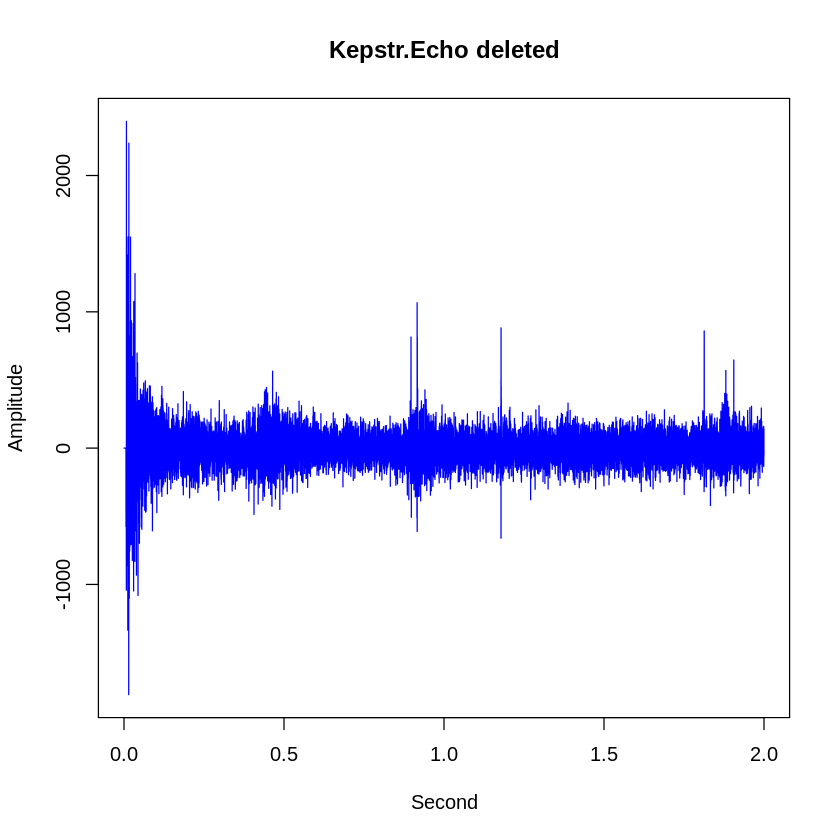

In [212]:
temp1 <- lecho[delayindex + (length(lecho) / 2)]
lecho[delayindex + (length(lecho) / 2)] <- 0
temp2 <- lecho[delayindex2 + (length(lecho) / 2)]
lecho[delayindex2 + (length(lecho) / 2)] <- 0
delayindex3 = which(lecho == max(lecho)) - (length(lecho) / 2)
delay3 = lecho[delayindex3]
lecho[delayindex + (length(lecho) / 2)] <- temp1
lecho[delayindex2 + (length(lecho) / 2)] <- temp2
d3 <- deleteecho(d2,lecho,file52@samp.rate, delay3 - timestep, 0.3)

decho<-ceps(d3,file52@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file52 Kepstrum")
decho[1:50,2]<- 0
matplot(decho[,1],decho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr.Echo deleted" )

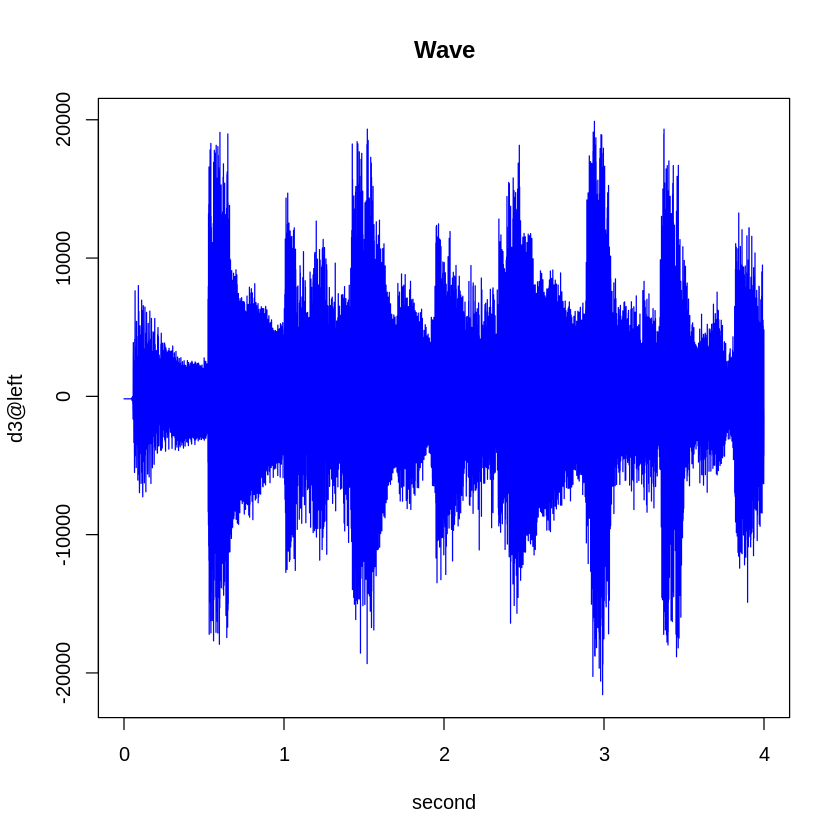

In [213]:
N <- length(d3@left)
xt <- seq(0, N/d3@samp.rate, length.out = N)
matplot(xt,d3@left,type ="l",xlab = "second",col="blue",main = "Wave")

In [214]:
writeWave(d3, "file52.wav")

In [215]:
file53 <- readWave("var5_3.wav")

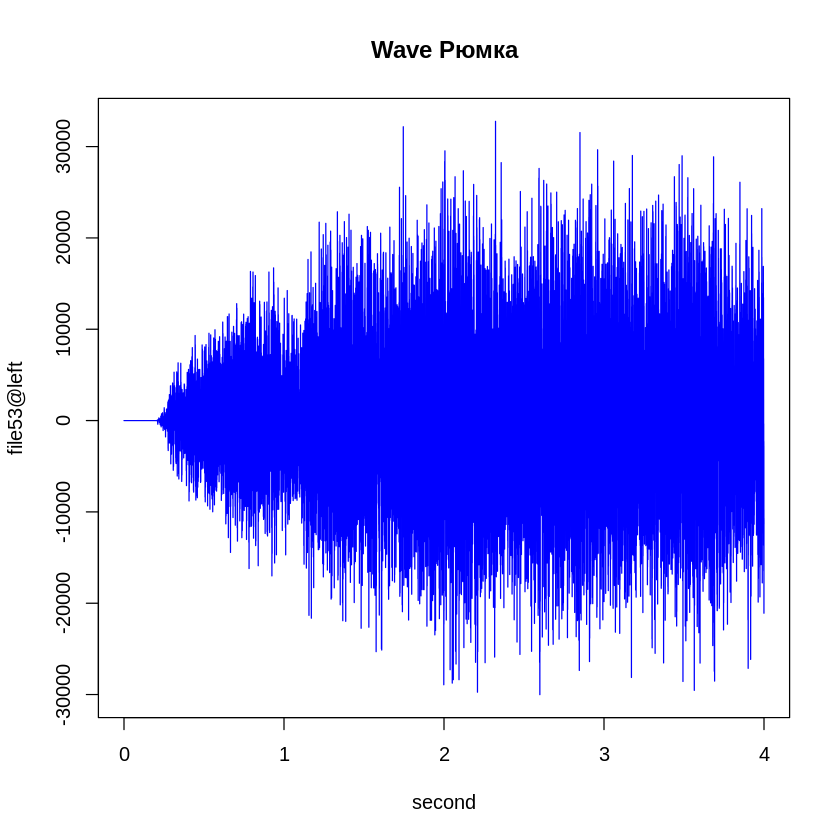

In [217]:
N <- length(file53@left)
xt <- seq(0, N/file53@samp.rate, length.out = N)
matplot(xt,file53@left,type ="l",xlab = "second",col="blue",main = "Wave Рюмка")

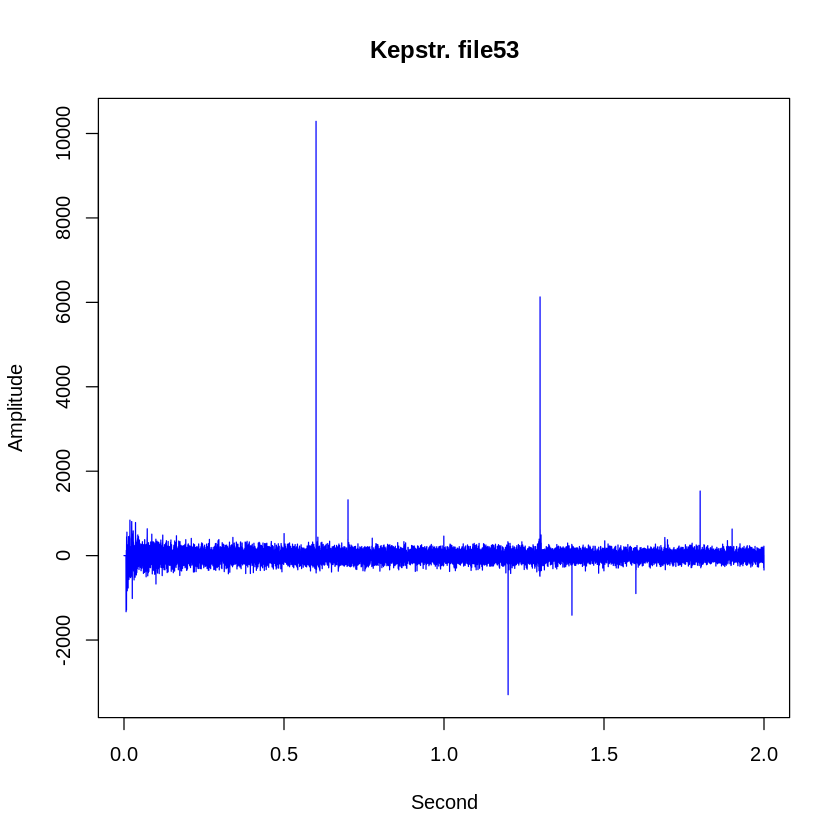

In [218]:
lecho<-ceps(file53,file53@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file53 Kepstrum")
lecho[1:50,2]<- 0

matplot(lecho[,1],lecho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr. file53" )

[1] 10288.49

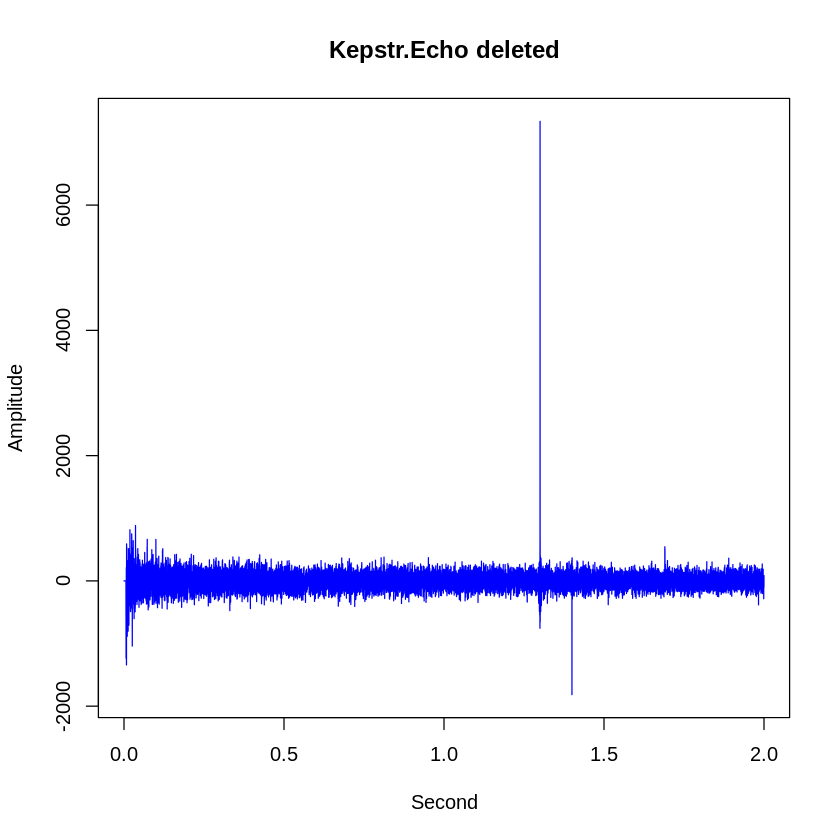

In [219]:
#findecho
max(lecho)
timestep = lecho[2]

delayindex = which(lecho == max(lecho)) - (length(lecho) / 2)
delay1 = lecho[delayindex]
d1 <- deleteecho(file53,lecho,file53@samp.rate, delay1 - timestep, 0.9)

decho<-ceps(d1,file53@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file53 Kepstrum")
decho[1:50,2]<- 0
matplot(decho[,1],decho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr.Echo deleted" )

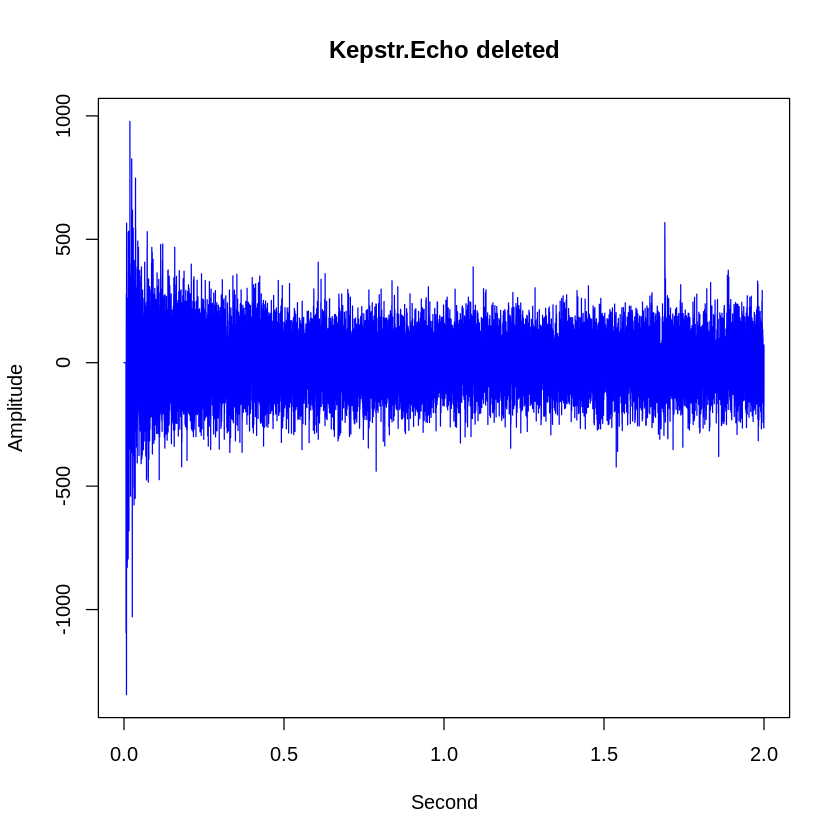

In [220]:
temp <- lecho[delayindex + (length(lecho) / 2)]
lecho[delayindex + (length(lecho) / 2)] <- 0
delayindex2 = which(lecho == max(lecho)) - (length(lecho) / 2)
delay2 = lecho[delayindex2]
lecho[delayindex + (length(lecho) / 2)] <- temp
d2 <- deleteecho(d1,lecho,file52@samp.rate, delay2 - timestep, 0.8)

decho<-ceps(d2,file52@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file52 Kepstrum")
decho[1:50,2]<- 0
matplot(decho[,1],decho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr.Echo deleted" )

In [221]:
writeWave(d2, "file53.wav")

In [ ]:
deleteecho<-function(w,kep,f,delay,Magnit)
{

  kepnum <- as.vector(kep[,2],mode = "numeric")
  n <- length(kepnum)
  delayIndex <-as.integer(delay/(1 / f))
  delayIndex <- min(delayIndex,n)+1
  Coeff <- -Magnit;
  Shift <- delayIndex;
  resl = w@left
  m <- length(resl)
  ret <- w
  while(Shift <= m)
  {
    for(i in (Shift+1):m)
    {
      dl = w@left[i-Shift]
      resl[i] <- as.integer(resl[i]+ Coeff*dl)
    }
    Shift <- Shift + delayIndex;
    Coeff <- -Coeff*Magnit;
  }
  ret@left <- resl
  if (w@stereo== TRUE)
  {
    Coeff <- -Magnit;
    Shift <- delayIndex;
    resr = w@right
    m <- length(resr)
    while(Shift <= m)
    {
      for(i in (Shift+1):m)
      {

        dr = w@right[i-Shift]
        resr[i] <- as.integer(resr[i]+ Coeff*dr)
      }
      Shift <- Shift + delayIndex;
      Coeff <- -Coeff*Magnit;
    }
    ret@right <- resr
  }

  return(ret)
}